# Text Processing Project
The aim of this project is to fine-tune and  test various Transformers models on the Rotten Tomatoes Dataset, on a sentiment analysis\text classification task. We will evaluate several Transformers models, to see which one has the better overall performances. We will use pytorch and the transformers framework from huggin face. We will test the DistilBERT model, the RoBERTa mode and the BigBird Model. Our task is to correctly classificate a movie review as negative or positive one, given the review itself. It is a pretty standard task, but we want to compare different model on this to see the difference of performance in terms of accuracy, FLOPS, training time etc. etc. .
A transformer,introduced in the paper [Attention is all you need](https://arxiv.org/abs/1706.03762) is an an architecture that use the Attention Mechanism to process data, which permits the model to focus on the most important pieces of the text.
It improves the model's ability to process longer sequences at each time step. In particular, in the transformer architecture what is used is a **Multi-Head Attention Layer**. The Transformer architecture follows an encoder-decoder structure,  the task of the encoder, is to map an input sequence to a sequence of continuous representations, which is then fed into a decoder.

The decoder, receives the output of the encoder together with the decoder output at the previous time step to generate an output sequence.



The six layers of the Transformer encoder apply the same linear transformations to all the words in the input sequence, but each layer employs different weight and bias parameters to do so.

Furthermore, each of these two sublayers has a residual connection around it.

An important consideration is that the Transformer architecture cannot inherently capture any information about the relative positions of the words in the sequence since it does not make use of recurrence. This information has to be injected by introducing positional encodings to the input embeddings.

The positional encoding vectors are of the same dimension as the input embeddings and are generated using sine and cosine functions of different frequencies. Then, they are simply summed to the input embeddings in order to inject the positional information.

The decoder shares several similarities with the encoder.

The Transformers architecture improved the state-of-the-art in several NLP tasks with lower training costs since recurrent connections are not used

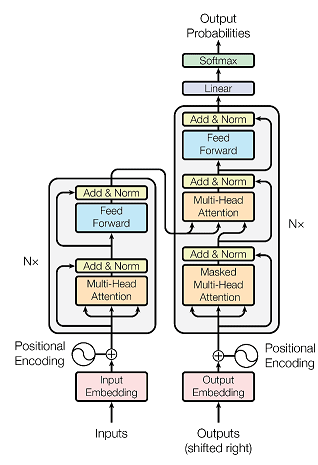

In [ ]:
#display GPU INFOS

#For our test we used a GPU NVIDIA A100 OF 40960MiB (40 GB)

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue May 30 11:35:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    45W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#display RAM INFOS

#We use a ram of 27.3 GB

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))


Your runtime has 27.3 gigabytes of available RAM



In [ ]:
#install useful modules
!pip install transformers==4.28.0
!pip install datasets
!pip install evaluate
!pip install git+https://github.com/huggingface/accelerate
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 96.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 36.7 MB/s eta 0:00:

In [ ]:
#importing useful

import torch
import numpy as np
from transformers import AutoTokenizer, DataCollatorWithPadding , AutoModelForSequenceClassification ,  TrainingArguments, Trainer

from datasets import load_dataset
import evaluate
import tensorflow as tf
from transformers.keras_callbacks import KerasMetricCallback

#downloading the dataset
dataset = load_dataset("rotten_tomatoes")

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Dataset rotten_tomatoes downloaded and prepared to /root/.cache/huggingface/datasets/rotten_tomatoes/default/1.0.0/40d411e45a6ce3484deed7cc15b82a53dad9a72aafd9f86f8f227134bec5ca46. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})

Our dataset is already divided in Train , Validation and Test. The train set is composed by 8530 elements, which are equally distributed between positive and negative, same goes from the Validation and Test set, each one composed of 1066 elements. Every split set has the text section, in which the reviews are stored and their relative labels in the label section. The data is balanced.

In [ ]:
#an example of the train set
example = dataset["train"][0] ["text"]
print(example)
print(dataset["train"][0]["label"])

the rock is destined to be the 21st century's new " conan " and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .
1


# Part 1 - BERT
In this part we will use the BERT (Bidirectional Encoder Representations from Transformers) architecture. [BERT Paper](https://arxiv.org/abs/1810.04805)
BERT’s key technical innovation is applying the bidirectional training of Transformer, to language modelling, a language model which is bidirectionally trained can have a deeper sense of language context and flow than single-direction language models. A novel technique was used, named Masked LM (MLM) which allows bidirectional training in models in which it was previously impossible. Since BERT’s goal is to generate a language model, only the encoder mechanism is necessary. BERT was trained on the MLM task and on the Next Sentence Prediction task, each sentence is tokenized using WordPiece and is pretrained on BookCorpus (800M words) and English Wikipedia (2,500Mwords).
In the MLM task, before feeding word sequences into BERT, 15% of the words in each sequence are replaced with a [MASK] token. The model then attempts to predict the original value of the masked words, based on the context provided by the other, non-masked, words in the sequence.
In the Next Sentence Prediction task, the model receives pairs of sentences as input and learns to predict if the second sentence in the pair is the subsequent sentence in the original document. During training, 50% of the inputs are a pair in which the second sentence is the subsequent sentence in the original document, while in the other 50% a random sentence from the corpus is chosen as the second sentence. The assumption is that the random sentence will be disconnected from the first sentence. A [CLS] token is inserted at the beginning of the first sentence and a [SEP] token is inserted at the end of each sentence.
A sentence embedding indicating Sentence A or Sentence B is added to each token.
When training the BERT model, Masked LM and Next Sentence Prediction are trained together, with the goal of minimizing the combined loss function of the two strategies.

For our task, we add a classification layer on top of the Transformer output for the [CLS] token, and we use a slightly different version of bert, DistilBERT [DistilBERT paper](https://arxiv.org/abs/1910.01108), a faster and lighter version, that uses Distillation, a technique where where a large complex model(teacher) distils its knowledge and passes it to train a smaller network(student) to match the output. The DistilBERT architecture is the same of BERT, it just have half of the layers and is trained with distillation technique. DistilBERT retains 97% of BERT performance, while being 40 % smaller and 60 . We will fine-tune this variant, adding a classification head on top.





In [ ]:
#BERT tokenizer pretrained, it is the uncased version so it does not make a difference between english and English and also strips out an accent markers.
tokenizer_BERT = AutoTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
#tokenizing the dataset according to the BERT tokenizer

def tokenization_BERT(batched_text):
    return tokenizer_BERT(batched_text["text"], truncation=True, padding = 'max_length')

In [ ]:
tokenized_dataset_bert = dataset.map(tokenization_BERT, batched=True)

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [ ]:
tokenized_dataset_bert

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1066
    })
})

In [ ]:
print(len(tokenized_dataset_bert["train"]["input_ids"][0]))

512


In [ ]:
#Collating data and pads it to the same lenght, concatenating it into a single tensor
data_collator_BERT = DataCollatorWithPadding(tokenizer=tokenizer_BERT)

In [ ]:
#Define the metrics that we want to compute

accuracy = evaluate.load("accuracy")


"""def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)"""


from sklearn.metrics import precision_recall_fscore_support, accuracy_score
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
#define the labels to id and viceversa

id2label = {0: "NEGATIVE", 1: "POSITIVE"}
label2id = {"NEGATIVE": 0, "POSITIVE": 1}

In [ ]:
#download the pretrained model of distilbert

model_BERT = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=2, id2label=id2label, label2id=label2id
)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier

In [ ]:
#we define the training args and the train (fine-tune) the model on our data set, we will use the same set of parameters for all the model in order to have a fairer comparison

training_args = TrainingArguments(
    output_dir="test_trainer", #The output directory where the model predictions and checkpoints will be written.
    learning_rate=2e-5, #The initial learning rate for AdamW optimizer
    per_device_train_batch_size=16, #The batch size per GPU/TPU core/CPU for training.
    per_device_eval_batch_size=16, #The batch size per GPU/TPU core/CPU for evaluation.
    num_train_epochs=2, #Total number of training epochs to perform
    weight_decay=0.01, #The weight decay to apply (if not zero) to all layers except all bias and LayerNorm weights in AdamW optimizer.
    evaluation_strategy="epoch", #The evaluation strategy to adopt during training.
    save_strategy="epoch", #The checkpoint save strategy to adopt during training.
    load_best_model_at_end=True, #Whether or not to load the best model found during training at the end of training.
    push_to_hub=False, #Whether or not to push the model to the Hub every time the model is saved.
)

#The Trainer contains the basic training loop, it is optimized for huggin face Transformers models.
trainer = Trainer(
    model=model_BERT,#the model to train
    args=training_args, #the training arguments
    train_dataset=tokenized_dataset_bert["train"], #train dataset
    eval_dataset=tokenized_dataset_bert["validation"], #validation dataset
    tokenizer=tokenizer_BERT, #The tokenizer used to preprocess the data.
    data_collator=data_collator_BERT, #the data collator used for the model
    compute_metrics=compute_metrics, #the metrics to compute for the model training/validation
)

history_BERT = trainer.train() #starting the training loop

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.412500,0.345490,0.839587,0.839135,0.841509,0.836773
2,0.250100,0.377515,0.849906,0.849341,0.852552,0.846154


In [ ]:
print(history_BERT[2]) #the result of the training

{'train_runtime': 222.4716, 'train_samples_per_second': 76.684, 'train_steps_per_second': 4.801, 'total_flos': 2259893821071360.0, 'train_loss': 0.32485776626215446, 'epoch': 2.0}


In [ ]:
trainer.evaluate(tokenized_dataset_bert["test"]) #the evaluation on the test set

{'eval_loss': 0.3798074424266815,
 'eval_accuracy': 0.8395872420262664,
 'eval_f1': 0.8388312912346843,
 'eval_precision': 0.8428030303030303,
 'eval_recall': 0.8348968105065666,
 'eval_runtime': 4.5621,
 'eval_samples_per_second': 233.666,
 'eval_steps_per_second': 14.686,
 'epoch': 2.0}

# Part 2 - RoBERTa

RoBERTa (Robustly Optimized BERT Pretraining Approach) [RoBERTa paper](https://arxiv.org/abs/1907.11692) builds on BERT and modifies the pre-training strategy proposed in the orginal paper, to improve the performance of the model.
It introduced Dynamic Masking, Masking is performed dinamically during training for each sentence, instead of using static pre-processed masking. Removed the Remove Next Sentence Prediction Task, and also used Bigger batch size, BERT was pre-trained with a batch size of 256 for 1M steps; they propose to use a batch size of 2K sequences for a total of 125K steps, proving that this leads to better results with reduced training times. RoBERTa was trained on a dataset of 160GB of text, which is more than 10 times larger than the dataset used to train BERT. This implementation is the same as BertModel with a tiny embeddings tweak, RoBERTa has the same architecture as BERT, but uses a byte-level BPE as a tokenizer. RoBERTa has been shown to outperform BERT and other state-of-the-art models on a variety of natural language processing tasks, including language translation, text classification, and question answering.

In [ ]:
#Downloading the pretrained model and tokenizer, as usual we will use the the pretained model of bert with a classification head for our purpose and fine tine it.

from transformers import RobertaForSequenceClassification , RobertaTokenizerFast
model_Roberta = RobertaForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion") #Roberta model trained on ~58M tweets and finetuned for emotion recognition with the TweetEval benchmark.
tokenizer_Roberta = RobertaTokenizerFast.from_pretrained('roberta-base', max_length = 512)

In [ ]:
#tokenizer procedure
def tokenization_Roberta(batched_text):
    return tokenizer_Roberta(batched_text['text'], padding = True, truncation=True)

In [ ]:
#tokenized dataset
tokenized_dataset_Roberta = dataset.map(tokenization_Roberta, batched=True)

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [ ]:
#show how the tokenizer is able to reconstruct the original text
print(tokenized_dataset_Roberta["train"]["input_ids"][0])
print(tokenizer_Roberta.decode(tokenized_dataset_Roberta["train"]["input_ids"][0]))

[0, 627, 3152, 16, 19083, 7, 28, 5, 733, 620, 3220, 18, 92, 22, 2764, 260, 22, 8, 14, 37, 18, 164, 7, 146, 10, 17158, 190, 2388, 87, 4709, 282, 279, 8447, 5557, 329, 47129, 2156, 1236, 12001, 12, 3998, 5247, 3538, 9656, 1794, 50, 11235, 2987, 842, 9487, 479, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
<s>the rock is destined to be the 21st century's new " conan " and that he's going to make a splash even greater than arnold schwarzenegger, jean-claud van damme or steven segal.</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>


In [ ]:
data_collator_Roberta = DataCollatorWithPadding(tokenizer=tokenizer_Roberta)

In [ ]:
#training arguments for RoBERTa
training_args_Roberta = TrainingArguments(
    output_dir="test_trainer",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,

)

In [ ]:
#training loop for RoBERTa
trainer_Roberta = Trainer(
    model=model_Roberta,
    args=training_args_Roberta,
    train_dataset=tokenized_dataset_Roberta["train"],
    eval_dataset=tokenized_dataset_Roberta["validation"],
    tokenizer=tokenizer_Roberta,
    data_collator=data_collator_Roberta,
    compute_metrics=compute_metrics,
)

hystory_Roberta  = trainer_Roberta .train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.369700,0.305069,0.882739,0.878993,0.908000,0.851782
2,0.227200,0.335003,0.892120,0.892423,0.889925,0.894934


In [ ]:
#evaluation on the test set of RoBERTa
trainer_Roberta.evaluate(tokenized_dataset_Roberta["test"])

{'eval_loss': 0.3388093113899231,
 'eval_accuracy': 0.874296435272045,
 'eval_f1': 0.8681102362204723,
 'eval_precision': 0.9130434782608695,
 'eval_recall': 0.8273921200750469,
 'eval_runtime': 1.242,
 'eval_samples_per_second': 858.322,
 'eval_steps_per_second': 53.947,
 'epoch': 2.0}

In [ ]:
#RoBERTa training metrics
print(hystory_Roberta)

TrainOutput(global_step=1068, training_loss=0.2904607687103614, metrics={'train_runtime': 86.2083, 'train_samples_per_second': 197.893, 'train_steps_per_second': 12.389, 'total_flos': 688046737155024.0, 'train_loss': 0.2904607687103614, 'epoch': 2.0})


# Part 3 Big Bird

BERT works on a full self-attention mechanism. This leads to a quadratic growth of the computational and memory requirements for every new input token. The maximum input size is around 512 tokens which means this model cannot be used for larger inputs & for tasks like large document summarization. This basically means a large string has to be broken into smaller segments before applying them as input. This content fragmentation also causes a significant loss of context which makes its application limited. BigBird [Big Bird paper](https://arxiv.org/abs/2007.14062) runs on a sparse attention mechanism that allows it to overcome the quadratic dependency of BERT while preserving the properties of full-attention models. It combines three types of spartification:
**Random attention:** each node is randomly linked to other Y nodes.
**Window attention:** each node is connected to its u neighboors, this choice comes from the heuristic consideration for which the most important information is generally local information
**Global attention:** b nodes are completely connected
In the said paper of BigBird, researchers show how the Sparse Attention mechanism used in BigBird is as powerful as the full self-attention mechanism (used in BERT). Besides this, they also show “how Sparse encoder-decoders are Turing Complete”. One of the key features of BigBird is its capability to handle Longer Sequences than what was previously possible. Using BigBird and its Sparse Attention mechanism, the team of researchers decreased the complexity of O(n²) (of BERT) to just O(n). This means that the input sequence which was limited to 512 tokens is now increased to 4096 tokens (8 * 512) on the same hardware. BigBird performs better than RoBERTa and achieved SOTA on various tasks involving very long sequences such as long documents summarization, question-answering with long contexts.

For our task, we will use the pretrained model with a classification head on top and fine tune it on the dataset.


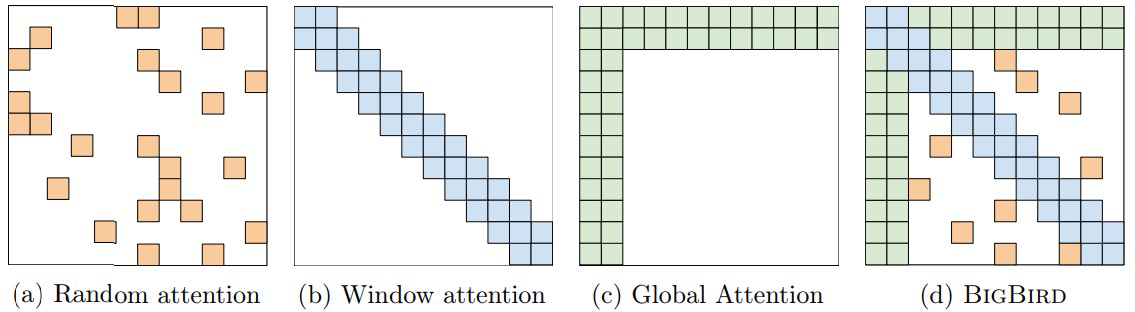


In [ ]:
#download the pretrained model
from transformers import BigBirdTokenizer, BigBirdForSequenceClassification
model_BigBird = BigBirdForSequenceClassification.from_pretrained('google/bigbird-roberta-base',
                num_labels = 2,
                id2label=id2label,
                label2id=label2id
                )

Some weights of the model checkpoint at google/bigbird-roberta-base were not used when initializing BigBirdForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BigBirdForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BigBirdForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BigBirdForSequenceClassifica

In [ ]:
#BigBird tokenizer
tokenizer_BigBird = AutoTokenizer.from_pretrained('google/bigbird-roberta-base')

In [ ]:
#tokenization process, we fix the tokens to 512 max for a fairer comparision and also because more token are useless for our dataset
def tokenization_BigBird(batched_text):
    return tokenizer_BigBird(batched_text['text'], padding = 'max_length', truncation=True, max_length = 512)



In [ ]:
#dataset tokenized
tokenized_dataset_bigbird = dataset.map(tokenization_BigBird, batched=True)

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [ ]:
tokenized_dataset_bigbird

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1066
    })
})

In [ ]:
#example to show that the tokenizer is able to recostrunct the original text
print(tokenized_dataset_bigbird["train"]["input_ids"][0])
print(tokenizer_BigBird.decode(tokenized_dataset_bigbird["train"]["input_ids"][0]))

[65, 363, 3982, 419, 24086, 385, 408, 363, 2411, 402, 4390, 439, 750, 467, 864, 12748, 467, 391, 427, 440, 439, 1117, 385, 888, 358, 22971, 873, 3845, 722, 321, 1602, 828, 5614, 5868, 190, 44129, 938, 575, 11126, 113, 666, 3986, 5820, 1902, 1427, 494, 437, 10298, 365, 39940, 865, 66, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
data_collator_BigBird = DataCollatorWithPadding(tokenizer=tokenizer_BigBird)

In [ ]:
#training args for the BigBird model, we used a lower learning rate in order to avoind overfitting
training_args_BigBird = TrainingArguments(
    output_dir="test_trainer",
    learning_rate=2e-6,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,

)

In [ ]:
#Train loop for BigBird

trainer_BigBird = Trainer(
    model=model_BigBird,
    args=training_args_BigBird,
    train_dataset=tokenized_dataset_bigbird["train"],
    eval_dataset=tokenized_dataset_bigbird["validation"],
    tokenizer=tokenizer_BigBird,
    data_collator=data_collator_BigBird,
    compute_metrics=compute_metrics,
)

hystory_BigBird  = trainer_BigBird.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.119900,0.375583,0.897749,0.899908,0.881295,0.919325
2,0.172500,0.362513,0.899625,0.901564,0.884477,0.919325


In [ ]:
#evalutation on the test set
trainer_BigBird.evaluate(tokenized_dataset_bigbird["test"])

{'eval_loss': 0.40993767976760864,
 'eval_accuracy': 0.8958724202626641,
 'eval_f1': 0.8959700093720712,
 'eval_precision': 0.8951310861423221,
 'eval_recall': 0.8968105065666041,
 'eval_runtime': 9.3208,
 'eval_samples_per_second': 114.368,
 'eval_steps_per_second': 7.188,
 'epoch': 2.0}

In [ ]:
#training metrics
print(hystory_BigBird)

TrainOutput(global_step=1068, training_loss=0.14701064784875076, metrics={'train_runtime': 463.7477, 'train_samples_per_second': 36.787, 'train_steps_per_second': 2.303, 'total_flos': 4519626538967040.0, 'train_loss': 0.14701064784875076, 'epoch': 2.0})


# Part 4 - Comparision & Conclusions

In this part we will analyze all the results that we got and compare them. First of all let's look at the literature on this task and dataset, to see which are the best result avaible online. [Papers with code](https://paperswithcode.com/sota/text-classification-on-rotten-tomatoes) has some results from model of the community, and this are the only actual results available, nothing can be found in terms of papers for this dataset.  There are only the distilbert model and RoBERTa model result available, so we wil compare our two models with those results, for BigBird nothing was found for this dataset, so we will just compare the result of big bird with the other model that we got, to give ourself an idea of his performance. Our trained model DistilBERT achieves an accuracy of 0.839 on the test set, on PapersWithCode there are two DistilBert model result, the best one has an accuracy of 0.841 while the other has 0.839, so our model is slighly worse than the best one, but still has a good performance (note that the result on paperswithcode it is not clear if the score is obtained in the validation or evaluation set, but we assume they are from the latter one, for a fairer comparison) For the RoBERTa model instaed, our model achieves an accuracy of 0.874 on the test set, while on paperswithcode the best (and only) one achieves an accuracy of 0.867, so in this case our fine tuned model works better. Our best model is the Big Bird one which achieves an accuracy of 0.895 on the test. In terms of flops we have that the biggest are achieved by the Big Bird model, followed by the BERT model and for least the RoBERTa model, which is the lightest one. Also in terms of training time, the RoBERTa one is the fastest. Given all of this, for our specific case the RoBERTa model is a good trade-off between accuracy and flops/training time, but if the want to the best performance, BigBird is the best model, both are for sure better than the BERT model. The result we got are in line with what the papers achieved too, so our work is valid. For further work and evalutation we could run some test on a more complex dataset and on some other transformer architecture, but more computational power is needed.

Note: I tried also to use GPT/GPT2 and other variants of trasformers architecture, but they were too computational expensive for the resources given by Colab (i was lucky to get 40 GB CPU for this run of test, but never got anymore after it).